# Data Analysis (Classification): Decision Trees
Decision Tree performs classification by splitting a dataset into smaller and smaller subsets forming a tree structure with decision nodes and leaf nodes.

## Import Libraries

In [1]:
# Import Required Modules and Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import sys

import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve,classification_report, confusion_matrix

In [2]:
cd

/root


## Load Data

In [3]:
# Upload the X and y Data
X = pd.read_csv('Project/Cleaned/Classification/X.csv', na_values = ['..'])
y = pd.read_csv('Project/Cleaned/Classification/y.csv', na_values = ['..'])
X_train = pd.read_csv('Project/Cleaned/Classification/X_train.csv', na_values = ['..'])
X_test = pd.read_csv('Project/Cleaned/Classification/X_test.csv', na_values = ['..'])
y_train = pd.read_csv('Project/Cleaned/Classification/y_train.csv', na_values = ['..'])
y_test = pd.read_csv('Project/Cleaned/Classification/y_test.csv', na_values = ['..'])

# Drop Column
X.drop(['Unnamed: 0'], axis=1, inplace=True)
y.drop(['Unnamed: 0'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
y_train.drop(['Unnamed: 0'], axis=1, inplace=True)
y_test.drop(['Unnamed: 0'], axis=1, inplace=True)

# Load Dictionary
dictionary_series = np.load('Project/Cleaned/dictionary_series.npy',allow_pickle='TRUE').item()

In [4]:
# Shape of Train and Test Data
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_test: (999, 20)
y_test: (999, 1)
X_train: (3993, 20)
y_train: (3993, 1)


## Decision Trees

In [5]:
# Create and Train Model
model_dt = DecisionTreeClassifier().fit(X_train,y_train)

# Model Prediction
y_prediction = model_dt.predict(X_test)

# Model Results
model_results = [['Score', model_dt.score(X_train, y_train)],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_dt = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_dt

,Evaluation Metric,Value
0,Score,0.993739
1,Accuracy,0.949950


## Hyperparameter Tuning 

In [6]:
# Grid Search
model_dt = DecisionTreeClassifier()

criterion = ["gini", "entropy"]
max_depth = np.arange(3,15)

param_grid = dict(criterion=criterion,
                 max_depth=max_depth)

grid = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train.values.ravel())

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.9443994843178032
Best Params:  {'criterion': 'gini', 'max_depth': 13}


In [7]:
# Tuning Depth of Decision Tree
max_depth_range = list(range(1, 6))

accuracy = []
for depth in max_depth_range:
    
    model = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)
accuracy

[0.8438438438438438,
 0.8848848848848849,
 0.8898898898898899,
 0.8928928928928929,
 0.9009009009009009]

In [8]:
# Tuning Depth of Decision Tree
print("Accuracy Scores Max:    {}".format(np.max(accuracy)))
print("Optimal Value for Depth: ", accuracy.index((np.max(accuracy))))
model_depth_range_accuracy_table = pd.DataFrame(accuracy, range(1,6), columns=['Score'])
model_depth_range_accuracy_table

Accuracy Scores Max:    0.9009009009009009
Optimal Value for Depth:  4


,Score
1,0.843844
2,0.884885
3,0.889890
4,0.892893
5,0.900901


## Decision Trees with Grid Search Parameters

In [9]:
# Create and Train Model
model_dt = DecisionTreeClassifier(criterion="gini", max_depth=13).fit(X_train,y_train)

# Model Prediction
y_prediction = model_dt.predict(X_test)

# Model Results
model_results = [['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_dt = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Score'])
model_results_dt

,Evaluation Metric,Score
0,Accuracy,0.94995


## Cross-Validation

In [10]:
# Model Scores
model_scores = cross_val_score(model_dt, X, y.values.ravel(), cv=5)

print("Accuracy: %0.2f (+/- % 0.2f)" % (model_scores.mean(), model_scores.std() * 2))
print("CV Scores: ", model_scores)

Accuracy: 0.84 (+/-  0.05)
CV Scores:  [0.83283283 0.86786787 0.86773547 0.83667335 0.80661323]


## Feature Importance

In [11]:
# Feature Importance
model_dt_featureimportance = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(model_dt.feature_importances_,3)})
model_dt_featureimportance = model_dt_featureimportance.sort_values('Importance',ascending=False)
model_dt_featureimportance

,Feature,Importance
4,IT.MLT.MAIN.P2,0.442
18,TM.VAL.MRCH.R6.ZS,0.168
8,SE.PRM.TCHR.FE.ZS,0.052
17,SP.ADO.TFRT,0.045
16,SL.AGR.EMPL.FE.ZS,0.043
12,SH.ANM.ALLW.ZS,0.034
7,SE.PRM.NENR,0.033
19,TX.VAL.MRCH.R6.ZS,0.032
3,EG.FEC.RNEW.ZS,0.029
9,SE.SEC.CMPT.LO.FE.ZS,0.022


## Evaluating Model

In [12]:
# Classification Report
classification_report_dt_table = classification_report(y_test,y_prediction, output_dict=True)
classification_report_dt_table = pd.DataFrame(classification_report_dt_table).transpose()
classification_report_dt_table

,precision,recall,f1-score,support
0,0.956825,0.973088,0.964888,706.00000
1,0.932384,0.894198,0.912892,293.00000
accuracy,0.949950,0.949950,0.949950,0.94995
macro avg,0.944604,0.933643,0.938890,999.00000
weighted avg,0.949656,0.949950,0.949638,999.00000


In [13]:
# Confusion Matrix
model_confusion_matrix_dt = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_dt

array([[687,  19],
       [ 31, 262]])

Text(0.5, 257.44, 'Predicted label')

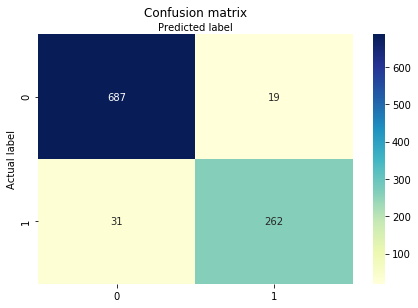

In [14]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_dt))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_dt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

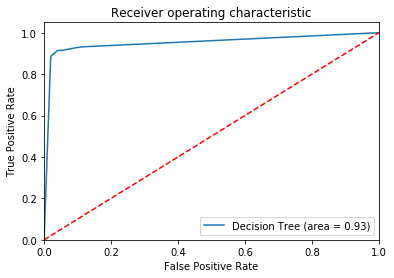

In [15]:
# ROC Curve
roc_auc_dt = roc_auc_score(y_test, model_dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()